# BUG 13

In [2]:
import tellurium as te
import numpy as np

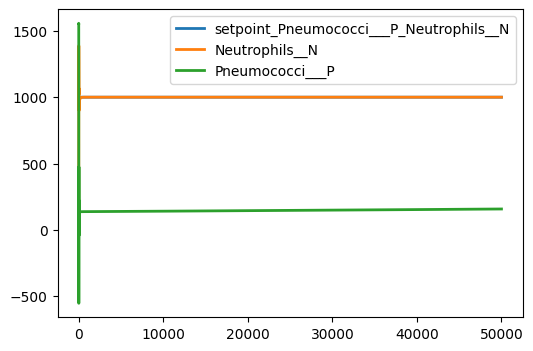

In [18]:
MODEL_SPECIFY_PARAMETERS = """
// Created by libAntimony v2.13.2
function Rate_Law_for_reaction_for__EU_decay(omega, P, Eu)
  omega*P*Eu;
end

Rate_Law_for_reaction_for__EU_decay is "Rate Law for reaction for  EU decay"

function Rate_Law_for_reaction_for_Ea_decay(d_E, Ea)
  d_E*Ea;
end

Rate_Law_for_reaction_for_Ea_decay is "Rate Law for reaction for Ea decay"

function Rate_Law_for_reaction_for_P_Decay(gamma_M_A, f_P_M_A, kd, D, M_Astar, P, gamma_N, N)
  (gamma_M_A*f_P_M_A/(1 + kd*D*M_Astar))*M_Astar*P + gamma_N*N*P;
end

Rate_Law_for_reaction_for_P_Decay is "Rate Law for reaction for P Decay"

function Rate_Law_for_reaction_for__P_production(r, P, Kp)
  r*P*(1 - P/Kp);
end

Rate_Law_for_reaction_for__P_production is "Rate Law for reaction for  P production"

function Rate_Law_for_reaction_for_C_decay(dc, C)
  dc*C;
end

Rate_Law_for_reaction_for_C_decay is "Rate Law for reaction for C decay"

function Rate_Law_for_reaction_for_C_production(alpha, Ea, kn, N, v, theta_M, M_Astar, d, k, P)
  alpha*(Ea/(1 + kn*N)) + v*(theta_M*P*M_Astar/(d + k + theta_M*P*(1 + kn*N)));
end

Rate_Law_for_reaction_for_C_production is "Rate Law for reaction for C production"

function Rate_Law_for_reaction_for_D_production(rho1, d_NP, N, P, rho2, d_N, rho3, d_E, Ea)
  rho1*d_NP*N*P + rho2*d_N*N + rho3*d_E*Ea;
end

Rate_Law_for_reaction_for_D_production is "Rate Law for reaction for D production"

function Rate_Law_for_reaction_for_Ea_production(omega, P, Eu)
  omega*P*Eu;
end

Rate_Law_for_reaction_for_Ea_production is "Rate Law for reaction for Ea production"

function Rate_Law_for_reaction_for_N_decay(d_NP, N, P, d_N)
  d_NP*N*P + d_N*N;
end

Rate_Law_for_reaction_for_N_decay is "Rate Law for reaction for N decay"

function Rate_Law_for_reaction_for_D_decay(d_D, D, M_Astar)
  d_D*D*M_Astar;
end

Rate_Law_for_reaction_for_D_decay is "Rate Law for reaction for D decay"

function Rate_Law_for_reaction_for_N_production(eta, C, N, N_max)
  eta*C*(1 - N/N_max);
end

Rate_Law_for_reaction_for_N_production is "Rate Law for reaction for N production"


model *Smith2011___Three_Stage_Innate_Immune_Response_to_a_Pneumococcal_Lung_Infection()

  // Compartments and Species:
  compartment compartment_;
  species Pneumococci___P in compartment_, Susceptible_epithelial_cells__EU in compartment_;
  species Epithelial_cells_with_bacteria_attached__Ea in compartment_, proinflammatory_cytokine__C in compartment_;
  species Neutrophils__N in compartment_, Debris__D in compartment_;

  // Assignment Rules:
  f_P_M_A := n^x*M_Astar/(Pneumococci___P^x + n^x*M_Astar);
  log_Pneumococcal__P := log10(Pneumococci___P);

  // Reactions:
  reaction_for__P_production:  => Pneumococci___P; compartment_*Rate_Law_for_reaction_for__P_production(r, Pneumococci___P, K_P);
  reaction_for_P_Decay: Pneumococci___P => ; compartment_*Rate_Law_for_reaction_for_P_Decay(gamma_M_A, f_P_M_A, k_d, Debris__D, M_Astar, Pneumococci___P, gamma_N, Neutrophils__N);
  reaction_for__EU_decay: Susceptible_epithelial_cells__EU => ; compartment_*Rate_Law_for_reaction_for__EU_decay(omega, Pneumococci___P, Susceptible_epithelial_cells__EU);
  reaction_for_Ea_production:  => Epithelial_cells_with_bacteria_attached__Ea; compartment_*Rate_Law_for_reaction_for_Ea_production(omega, Pneumococci___P, Susceptible_epithelial_cells__EU);
  reaction_for_Ea_decay: Epithelial_cells_with_bacteria_attached__Ea => ; compartment_*Rate_Law_for_reaction_for_Ea_decay(d_E, Epithelial_cells_with_bacteria_attached__Ea);
  reaction_for_C_production:  => proinflammatory_cytokine__C; compartment_*Rate_Law_for_reaction_for_C_production(alpha, Epithelial_cells_with_bacteria_attached__Ea, k_n, Neutrophils__N, v, theta_M, M_Astar, d, kappa, Pneumococci___P);
  reaction_for_C_decay: proinflammatory_cytokine__C => ; compartment_*Rate_Law_for_reaction_for_C_decay(d_C, proinflammatory_cytokine__C);
  reaction_for_N_production:  => Neutrophils__N; compartment_*Rate_Law_for_reaction_for_N_production(eta, proinflammatory_cytokine__C, Neutrophils__N, N_max);
  reaction_for_N_decay: Neutrophils__N => ; compartment_*Rate_Law_for_reaction_for_N_decay(d_NP, Neutrophils__N, Pneumococci___P, d_N);
  reaction_for_D_production:  => Debris__D; compartment_*Rate_Law_for_reaction_for_D_production(rho1, d_NP, Neutrophils__N, Pneumococci___P, rho2, d_N, rho3, d_E, Epithelial_cells_with_bacteria_attached__Ea);
  reaction_for_D_decay: Debris__D => ; compartment_*Rate_Law_for_reaction_for_D_decay(d_D, Debris__D, M_Astar);

  // Species initializations:
  Pneumococci___P = 100000;
  Susceptible_epithelial_cells__EU = 100000000;
  Epithelial_cells_with_bacteria_attached__Ea = 0;
  proinflammatory_cytokine__C = 0;
  Neutrophils__N = 0;
  Debris__D = 0;

  // Compartment initializations:
  compartment_ = 1;

  // Variable initializations:
  r = 1.13;
  K_P = 341765197.726012;
  gamma_M_A = 5.6e-06;
  n = 5;
  x = 2;
  d = 0.001;
  M_Astar = 1000000;
  gamma_N = 1e-05;
  theta_M = 4.2e-08;
  kappa = 0.042;
  v = 0.029;
  omega = 2.1e-08;
  d_E = 0.167;
  alpha = 0.021;
  k_n = 1.4e-05;
  d_C = 0.83;
  N_max = 180000;
  eta = 1.33;
  d_N = 0.063;
  d_NP = 1.76e-07;
  rho1 = 0.15;
  rho2 = 0.001;
  rho3 = 1e-05;
  d_D = 1.4e-07;
  k_d = 5e-09;
  s = 1000;

  // Other declarations:
  var f_P_M_A, log_Pneumococcal__P;
  const compartment_, r, K_P, gamma_M_A, n, x, d, M_Astar, gamma_N, theta_M;
  const kappa, v, omega, d_E, alpha, k_n, d_C, N_max, eta, d_N, d_NP, rho1;
  const rho2, rho3, d_D, k_d, s;

  // Unit definitions:
  unit volume = 1e-3 litre;
  unit time_unit = 3600 second;
  unit substance = 1e-3 mole;

  // Display Names:
  time_unit is "time";
  compartment_ is "compartment";
  Pneumococci___P is "Pneumococci  (P)";
  Susceptible_epithelial_cells__EU is "Susceptible epithelial cells (EU)";
  Epithelial_cells_with_bacteria_attached__Ea is "Epithelial cells with bacteria attached (Ea)";
  proinflammatory_cytokine__C is "proinflammatory cytokine (C)";
  Neutrophils__N is "Neutrophils (N)";
  Debris__D is "Debris (D)";
  log_Pneumococcal__P is "log Pneumococcal (P)";
  reaction_for__P_production is "reaction for  P production";
  reaction_for_P_Decay is "reaction for P Decay";
  reaction_for__EU_decay is "reaction for  EU decay";
  reaction_for_Ea_production is "reaction for Ea production";
  reaction_for_Ea_decay is "reaction for Ea decay";
  reaction_for_C_production is "reaction for C production";
  reaction_for_C_decay is "reaction for C decay";
  reaction_for_N_production is "reaction for N production";
  reaction_for_N_decay is "reaction for N decay";
  reaction_for_D_production is "reaction for D production";
  reaction_for_D_decay is "reaction for D decay";

  // CV terms:
  Pneumococci___P property "http://identifiers.org/ncit/C76384"
  Susceptible_epithelial_cells__EU property "http://identifiers.org/omit/0006083"
  Epithelial_cells_with_bacteria_attached__Ea property "http://identifiers.org/bto/BTO:0000152"
  proinflammatory_cytokine__C property "http://identifiers.org/ncit/C20464"
  Neutrophils__N property "http://identifiers.org/omit/0010527"
  Debris__D property "http://identifiers.org/ncit/C120869"

//vvvvvvvvvAdded by ControlSBMLvvvvvvvvvv
const Pneumococci___P

// Closed loop: Pneumococci___P -> Neutrophils__N

// **CREATING CLOSED LOOP SYSTEM**
setpoint_Pneumococci___P_Neutrophils__N = 1000
Neutrophils__N = 0.0

// Make sinusoid: NoiseSpec(sine_amp=0, sine_freq=0, random_mag=0 random_std=0, dc_gain=0, slope=0)
noise_Pneumococci___P_Neutrophils__N_ot := 0

// Make sinusoid: NoiseSpec(sine_amp=0, sine_freq=0, random_mag=0 random_std=0, dc_gain=0, slope=0)
disturbance_Pneumococci___P_Neutrophils__N_ot := 0

// Make filter: kF=0.0
filter_Pneumococci___P_Neutrophils__N_ot := filter_Pneumococci___P_Neutrophils__N_in 

// Make the PID controller
controller_kP_Pneumococci___P_Neutrophils__N = 1.5555
controller_kI_Pneumococci___P_Neutrophils__N = 0.018
controller_kD_Pneumococci___P_Neutrophils__N = 0.0
controller_derivative_error_Pneumococci___P_Neutrophils__N := -1*(-0.000000*filter_Pneumococci___P_Neutrophils__N_ot + 0.000000*filter_Pneumococci___P_Neutrophils__N_in)
controller_integral_error_Pneumococci___P_Neutrophils__N' = controller_Pneumococci___P_Neutrophils__N_in
controller_integral_error_Pneumococci___P_Neutrophils__N = 0
controller_Pneumococci___P_Neutrophils__N_ot := controller_kP_Pneumococci___P_Neutrophils__N*controller_Pneumococci___P_Neutrophils__N_in + controller_kI_Pneumococci___P_Neutrophils__N*controller_integral_error_Pneumococci___P_Neutrophils__N + controller_kD_Pneumococci___P_Neutrophils__N*controller_derivative_error_Pneumococci___P_Neutrophils__N

// Make the control error
control_error_Pneumococci___P_Neutrophils__N_ot := setpoint_Pneumococci___P_Neutrophils__N - filter_Pneumococci___P_Neutrophils__N_ot

// Connect the elements of the closed loop
controller_Pneumococci___P_Neutrophils__N_in := control_error_Pneumococci___P_Neutrophils__N_ot
Pneumococci___P := controller_Pneumococci___P_Neutrophils__N_ot + disturbance_Pneumococci___P_Neutrophils__N_ot
filter_Pneumococci___P_Neutrophils__N_in := Neutrophils__N + noise_Pneumococci___P_Neutrophils__N_ot
//^^^^^^^^^Added by ControlSBML^^^^^^^^^^
end

Smith2011___Three_Stage_Innate_Immune_Response_to_a_Pneumococcal_Lung_Infection is "Smith2011 - Three Stage Innate Immune Response to a Pneumococcal Lung Infection"

Smith2011___Three_Stage_Innate_Immune_Response_to_a_Pneumococcal_Lung_Infection model_entity_is "http://identifiers.org/biomodels.db/MODEL1808280007",
                                                                                                "http://identifiers.org/biomodels.db/BIOMD0000000924"
Smith2011___Three_Stage_Innate_Immune_Response_to_a_Pneumococcal_Lung_Infection identity "http://identifiers.org/biomodels.db/MODEL1808280007"
Smith2011___Three_Stage_Innate_Immune_Response_to_a_Pneumococcal_Lung_Infection container "http://identifiers.org/bto/BTO:0000763"
Smith2011___Three_Stage_Innate_Immune_Response_to_a_Pneumococcal_Lung_Infection taxon "http://identifiers.org/taxonomy/9606"
Smith2011___Three_Stage_Innate_Immune_Response_to_a_Pneumococcal_Lung_Infection description "http://identifiers.org/pubmed/21300073"
Smith2011___Three_Stage_Innate_Immune_Response_to_a_Pneumococcal_Lung_Infection property "http://identifiers.org/ncit/C157959",
                                                                                         "http://identifiers.org/ncit/C3137",
                                                                                         "http://identifiers.org/go/GO:0006955",
                                                                                         "http://identifiers.org/mamo/MAMO_0000046"
"""
rr = te.loada(MODEL_SPECIFY_PARAMETERS)
selections=[ "time", "setpoint_Pneumococci___P_Neutrophils__N", "Neutrophils__N", "Pneumococci___P"]
rr.simulate(0, 50000, 500000, selections=selections)
rr.plot()

# Grid analysis

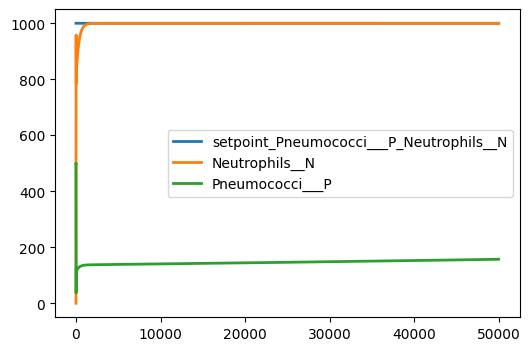

In [15]:
MODEL_GRID = """
// Created by libAntimony v2.13.2
function Rate_Law_for_reaction_for__EU_decay(omega, P, Eu)
  omega*P*Eu;
end

Rate_Law_for_reaction_for__EU_decay is "Rate Law for reaction for  EU decay"

function Rate_Law_for_reaction_for_Ea_decay(d_E, Ea)
  d_E*Ea;
end

Rate_Law_for_reaction_for_Ea_decay is "Rate Law for reaction for Ea decay"

function Rate_Law_for_reaction_for_P_Decay(gamma_M_A, f_P_M_A, kd, D, M_Astar, P, gamma_N, N)
  (gamma_M_A*f_P_M_A/(1 + kd*D*M_Astar))*M_Astar*P + gamma_N*N*P;
end

Rate_Law_for_reaction_for_P_Decay is "Rate Law for reaction for P Decay"

function Rate_Law_for_reaction_for__P_production(r, P, Kp)
  r*P*(1 - P/Kp);
end

Rate_Law_for_reaction_for__P_production is "Rate Law for reaction for  P production"

function Rate_Law_for_reaction_for_C_decay(dc, C)
  dc*C;
end

Rate_Law_for_reaction_for_C_decay is "Rate Law for reaction for C decay"

function Rate_Law_for_reaction_for_C_production(alpha, Ea, kn, N, v, theta_M, M_Astar, d, k, P)
  alpha*(Ea/(1 + kn*N)) + v*(theta_M*P*M_Astar/(d + k + theta_M*P*(1 + kn*N)));
end

Rate_Law_for_reaction_for_C_production is "Rate Law for reaction for C production"

function Rate_Law_for_reaction_for_D_production(rho1, d_NP, N, P, rho2, d_N, rho3, d_E, Ea)
  rho1*d_NP*N*P + rho2*d_N*N + rho3*d_E*Ea;
end

Rate_Law_for_reaction_for_D_production is "Rate Law for reaction for D production"

function Rate_Law_for_reaction_for_Ea_production(omega, P, Eu)
  omega*P*Eu;
end

Rate_Law_for_reaction_for_Ea_production is "Rate Law for reaction for Ea production"

function Rate_Law_for_reaction_for_N_decay(d_NP, N, P, d_N)
  d_NP*N*P + d_N*N;
end

Rate_Law_for_reaction_for_N_decay is "Rate Law for reaction for N decay"

function Rate_Law_for_reaction_for_D_decay(d_D, D, M_Astar)
  d_D*D*M_Astar;
end

Rate_Law_for_reaction_for_D_decay is "Rate Law for reaction for D decay"

function Rate_Law_for_reaction_for_N_production(eta, C, N, N_max)
  eta*C*(1 - N/N_max);
end

Rate_Law_for_reaction_for_N_production is "Rate Law for reaction for N production"


model *Smith2011___Three_Stage_Innate_Immune_Response_to_a_Pneumococcal_Lung_Infection()

  // Compartments and Species:
  compartment compartment_;
  species Pneumococci___P in compartment_, Susceptible_epithelial_cells__EU in compartment_;
  species Epithelial_cells_with_bacteria_attached__Ea in compartment_, proinflammatory_cytokine__C in compartment_;
  species Neutrophils__N in compartment_, Debris__D in compartment_;

  // Assignment Rules:
  f_P_M_A := n^x*M_Astar/(Pneumococci___P^x + n^x*M_Astar);
  log_Pneumococcal__P := log10(Pneumococci___P);

  // Reactions:
  reaction_for__P_production:  => Pneumococci___P; compartment_*Rate_Law_for_reaction_for__P_production(r, Pneumococci___P, K_P);
  reaction_for_P_Decay: Pneumococci___P => ; compartment_*Rate_Law_for_reaction_for_P_Decay(gamma_M_A, f_P_M_A, k_d, Debris__D, M_Astar, Pneumococci___P, gamma_N, Neutrophils__N);
  reaction_for__EU_decay: Susceptible_epithelial_cells__EU => ; compartment_*Rate_Law_for_reaction_for__EU_decay(omega, Pneumococci___P, Susceptible_epithelial_cells__EU);
  reaction_for_Ea_production:  => Epithelial_cells_with_bacteria_attached__Ea; compartment_*Rate_Law_for_reaction_for_Ea_production(omega, Pneumococci___P, Susceptible_epithelial_cells__EU);
  reaction_for_Ea_decay: Epithelial_cells_with_bacteria_attached__Ea => ; compartment_*Rate_Law_for_reaction_for_Ea_decay(d_E, Epithelial_cells_with_bacteria_attached__Ea);
  reaction_for_C_production:  => proinflammatory_cytokine__C; compartment_*Rate_Law_for_reaction_for_C_production(alpha, Epithelial_cells_with_bacteria_attached__Ea, k_n, Neutrophils__N, v, theta_M, M_Astar, d, kappa, Pneumococci___P);
  reaction_for_C_decay: proinflammatory_cytokine__C => ; compartment_*Rate_Law_for_reaction_for_C_decay(d_C, proinflammatory_cytokine__C);
  reaction_for_N_production:  => Neutrophils__N; compartment_*Rate_Law_for_reaction_for_N_production(eta, proinflammatory_cytokine__C, Neutrophils__N, N_max);
  reaction_for_N_decay: Neutrophils__N => ; compartment_*Rate_Law_for_reaction_for_N_decay(d_NP, Neutrophils__N, Pneumococci___P, d_N);
  reaction_for_D_production:  => Debris__D; compartment_*Rate_Law_for_reaction_for_D_production(rho1, d_NP, Neutrophils__N, Pneumococci___P, rho2, d_N, rho3, d_E, Epithelial_cells_with_bacteria_attached__Ea);
  reaction_for_D_decay: Debris__D => ; compartment_*Rate_Law_for_reaction_for_D_decay(d_D, Debris__D, M_Astar);

  // Species initializations:
  Pneumococci___P = 100000;
  Susceptible_epithelial_cells__EU = 100000000;
  Epithelial_cells_with_bacteria_attached__Ea = 0;
  proinflammatory_cytokine__C = 0;
  Neutrophils__N = 0;
  Debris__D = 0;

  // Compartment initializations:
  compartment_ = 1;

  // Variable initializations:
  r = 1.13;
  K_P = 341765197.726012;
  gamma_M_A = 5.6e-06;
  n = 5;
  x = 2;
  d = 0.001;
  M_Astar = 1000000;
  gamma_N = 1e-05;
  theta_M = 4.2e-08;
  kappa = 0.042;
  v = 0.029;
  omega = 2.1e-08;
  d_E = 0.167;
  alpha = 0.021;
  k_n = 1.4e-05;
  d_C = 0.83;
  N_max = 180000;
  eta = 1.33;
  d_N = 0.063;
  d_NP = 1.76e-07;
  rho1 = 0.15;
  rho2 = 0.001;
  rho3 = 1e-05;
  d_D = 1.4e-07;
  k_d = 5e-09;
  s = 1000;

  // Other declarations:
  var f_P_M_A, log_Pneumococcal__P;
  const compartment_, r, K_P, gamma_M_A, n, x, d, M_Astar, gamma_N, theta_M;
  const kappa, v, omega, d_E, alpha, k_n, d_C, N_max, eta, d_N, d_NP, rho1;
  const rho2, rho3, d_D, k_d, s;

  // Unit definitions:
  unit volume = 1e-3 litre;
  unit time_unit = 3600 second;
  unit substance = 1e-3 mole;

  // Display Names:
  time_unit is "time";
  compartment_ is "compartment";
  Pneumococci___P is "Pneumococci  (P)";
  Susceptible_epithelial_cells__EU is "Susceptible epithelial cells (EU)";
  Epithelial_cells_with_bacteria_attached__Ea is "Epithelial cells with bacteria attached (Ea)";
  proinflammatory_cytokine__C is "proinflammatory cytokine (C)";
  Neutrophils__N is "Neutrophils (N)";
  Debris__D is "Debris (D)";
  log_Pneumococcal__P is "log Pneumococcal (P)";
  reaction_for__P_production is "reaction for  P production";
  reaction_for_P_Decay is "reaction for P Decay";
  reaction_for__EU_decay is "reaction for  EU decay";
  reaction_for_Ea_production is "reaction for Ea production";
  reaction_for_Ea_decay is "reaction for Ea decay";
  reaction_for_C_production is "reaction for C production";
  reaction_for_C_decay is "reaction for C decay";
  reaction_for_N_production is "reaction for N production";
  reaction_for_N_decay is "reaction for N decay";
  reaction_for_D_production is "reaction for D production";
  reaction_for_D_decay is "reaction for D decay";

  // CV terms:
  Pneumococci___P property "http://identifiers.org/ncit/C76384"
  Susceptible_epithelial_cells__EU property "http://identifiers.org/omit/0006083"
  Epithelial_cells_with_bacteria_attached__Ea property "http://identifiers.org/bto/BTO:0000152"
  proinflammatory_cytokine__C property "http://identifiers.org/ncit/C20464"
  Neutrophils__N property "http://identifiers.org/omit/0010527"
  Debris__D property "http://identifiers.org/ncit/C120869"

//vvvvvvvvvAdded by ControlSBMLvvvvvvvvvv
const Pneumococci___P

// Closed loop: Pneumococci___P -> Neutrophils__N

// **CREATING CLOSED LOOP SYSTEM**
setpoint_Pneumococci___P_Neutrophils__N = 1000
Neutrophils__N = 0.0

// Make sinusoid: NoiseSpec(sine_amp=0, sine_freq=0, random_mag=0 random_std=0, dc_gain=0, slope=0)
noise_Pneumococci___P_Neutrophils__N_ot := 0

// Make sinusoid: NoiseSpec(sine_amp=0, sine_freq=0, random_mag=0 random_std=0, dc_gain=0, slope=0)
disturbance_Pneumococci___P_Neutrophils__N_ot := 0

// Make filter: kF=None
filter_Pneumococci___P_Neutrophils__N_ot := filter_Pneumococci___P_Neutrophils__N_in

// Make the PID controller
controller_kP_Pneumococci___P_Neutrophils__N = 0.5
controller_kI_Pneumococci___P_Neutrophils__N = 0.002
controller_integral_error_Pneumococci___P_Neutrophils__N' = controller_Pneumococci___P_Neutrophils__N_in
controller_integral_error_Pneumococci___P_Neutrophils__N = 0
controller_Pneumococci___P_Neutrophils__N_ot := controller_kP_Pneumococci___P_Neutrophils__N*controller_Pneumococci___P_Neutrophils__N_in + controller_kI_Pneumococci___P_Neutrophils__N*controller_integral_error_Pneumococci___P_Neutrophils__N

// Make the control error
control_error_Pneumococci___P_Neutrophils__N_ot := setpoint_Pneumococci___P_Neutrophils__N - filter_Pneumococci___P_Neutrophils__N_ot

// Connect the elements of the closed loop
controller_Pneumococci___P_Neutrophils__N_in := control_error_Pneumococci___P_Neutrophils__N_ot
Pneumococci___P := controller_Pneumococci___P_Neutrophils__N_ot + disturbance_Pneumococci___P_Neutrophils__N_ot
filter_Pneumococci___P_Neutrophils__N_in := Neutrophils__N + noise_Pneumococci___P_Neutrophils__N_ot
//^^^^^^^^^Added by ControlSBML^^^^^^^^^^
end

Smith2011___Three_Stage_Innate_Immune_Response_to_a_Pneumococcal_Lung_Infection is "Smith2011 - Three Stage Innate Immune Response to a Pneumococcal Lung Infection"

Smith2011___Three_Stage_Innate_Immune_Response_to_a_Pneumococcal_Lung_Infection model_entity_is "http://identifiers.org/biomodels.db/MODEL1808280007",
                                                                                                "http://identifiers.org/biomodels.db/BIOMD0000000924"
Smith2011___Three_Stage_Innate_Immune_Response_to_a_Pneumococcal_Lung_Infection identity "http://identifiers.org/biomodels.db/MODEL1808280007"
Smith2011___Three_Stage_Innate_Immune_Response_to_a_Pneumococcal_Lung_Infection container "http://identifiers.org/bto/BTO:0000763"
Smith2011___Three_Stage_Innate_Immune_Response_to_a_Pneumococcal_Lung_Infection taxon "http://identifiers.org/taxonomy/9606"
Smith2011___Three_Stage_Innate_Immune_Response_to_a_Pneumococcal_Lung_Infection description "http://identifiers.org/pubmed/21300073"
Smith2011___Three_Stage_Innate_Immune_Response_to_a_Pneumococcal_Lung_Infection property "http://identifiers.org/ncit/C157959",
                                                                                         "http://identifiers.org/ncit/C3137",
                                                                                         "http://identifiers.org/go/GO:0006955",
                                                                                         "http://identifiers.org/mamo/MAMO_0000046"
"""
rr = te.loada(MODEL_GRID)
selections=[ "time", "setpoint_Pneumococci___P_Neutrophils__N", "Neutrophils__N", "Pneumococci___P"]
rr.simulate(0, 50000, 500000, selections=selections)
rr.plot()